In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
pd.__version__ #pandas version

'0.17.1'

# Establish Connection to DB through SSH

In [3]:
from sshtunnel import SSHTunnelForwarder
import MySQLdb as db
import pandas as pd
import sys
import logging
#logging.basicConfig(stream=sys.stdout, level=logging.DEBUG) 
import paramiko
#ssh = paramiko.SSHClient()
#ssh.set_missing_host_key_policy(paramiko.AutoAddPolicy())
#ssh.connect('ssicluster2.tk.informatik.tu-darmstadt.de',port = 12822, username='arun',password='ArunDss@123',allow_agent=False,look_for_keys=False)
localhost = '127.0.0.1'
user = 'root'
password='kUrsVbpyfFWF'
database = 'Energy_AD'
def query(q):
     with SSHTunnelForwarder(
          ('ssicluster2.tk.informatik.tu-darmstadt.de', 12822),
          allow_agent=False,
          ssh_username='arun',
          ssh_password = 'ArunDss@123',
          #remote_bind_address=('130.83.163.8', 3306)
          remote_bind_address=('127.0.0.1', 3306)
           
     ) as server:
          conn = db.connect(host=localhost,
          port=server.local_bind_port,
          user=user,
          passwd=password,
          db=database)

          return pd.read_sql_query(q, conn)

# Run the desired query 

In [8]:
#!/home/arun/anaconda2/bin/python
import MySQLdb as db1
import pandas as pd
import datetime
import pandas.io.sql as psql

now = datetime.datetime.now()
print "Start date and time using str method of datetime object:"
print str(now)

chunk_size = 604800
offset = 2235788
location = 'Torschlag_Trafo' + '%'
list_data = []
#Uncomment and run the below query to read all the data of particular location
#while True:
#    q = ("SELECT * FROM energy_sample_data1 where location like '%s' ORDER BY Serial_no LIMIT %s" % (location,chunk_size))
#    print(q)
#    list_data.append(query(q))
#    offset += chunk_size
#    if len(list_data[-1]) < chunk_size:
#        break
#print("Query executed")
# print("Concatenating....")
# dfs = pd.concat(list_data)

#To read only specific rows of data
q = ("SELECT * FROM energy_sample_data1 where location like '%s' ORDER BY Serial_no LIMIT %s OFFSET %s" % (location,chunk_size,offset))
print(q)
list_data.append(query(q))
dfs = pd.concat(list_data)



now1 = datetime.datetime.now()
print "End date and time using str method of datetime object:"
print str(now1)

print("Execution Completed")







Start date and time using str method of datetime object:
2016-12-23 16:35:33.200625
SELECT * FROM energy_sample_data1 where location like 'Torschlag_Trafo%' ORDER BY Serial_no LIMIT 604800 OFFSET 2235788
End date and time using str method of datetime object:
2016-12-23 16:40:38.916486
Execution Completed


In [9]:
dfs.shape

(604800, 16)

In [10]:
dfs.head()

,Serial_no,Date,Time,V1,V2,V3,I1,I2,I3,I_N,Pges,Sges,CosPhi,Egy_trpt,Egy_con,Location
0,65895431,2016-01-13,00:00:00,232.66,232.33,232.13,6.51,17.78,13.85,14.40,8478.19,8850.19,0.90,22495,19831107.84,Torschlag_Trafo_13012016.csv
1,65895432,2016-01-13,00:00:01,232.66,232.33,232.13,6.51,17.78,13.85,14.40,8478.19,8850.19,0.90,22495,19831107.84,Torschlag_Trafo_13012016.csv
2,65895433,2016-01-13,00:00:02,232.74,232.45,232.26,6.59,14.24,13.95,14.83,7672.43,8078.60,0.91,22495,19831118.08,Torschlag_Trafo_13012016.csv
3,65895434,2016-01-13,00:00:03,232.74,232.45,232.26,6.59,14.24,13.95,14.83,7672.43,8078.60,0.91,22495,19831118.08,Torschlag_Trafo_13012016.csv
4,65895435,2016-01-13,00:00:04,232.74,232.45,232.26,6.59,14.24,13.95,14.83,7672.43,8078.60,0.91,22495,19831118.08,Torschlag_Trafo_13012016.csv


In [11]:
dfs.tail()

,Serial_no,Date,Time,V1,V2,V3,I1,I2,I3,I_N,Pges,Sges,CosPhi,Egy_trpt,Egy_con,Location
604795,66768246,2016-01-16,23:59:55,234.71,234.38,234.17,6.33,18.72,15.48,18.31,8992.14,9506.09,0.88,22495,22054904.32,Torschlag_Trafo_16012016.csv
604796,66768247,2016-01-16,23:59:56,234.71,234.38,234.17,6.33,18.72,15.48,18.23,8992.14,9506.09,0.88,22495,22054904.32,Torschlag_Trafo_16012016.csv
604797,66768248,2016-01-16,23:59:57,234.63,234.34,234.12,6.43,18.84,15.50,18.23,9031.58,9545.53,0.88,22495,22054904.32,Torschlag_Trafo_16012016.csv
604798,66768249,2016-01-16,23:59:58,234.63,234.34,234.12,6.43,18.84,15.50,18.23,9031.58,9545.53,0.88,22495,22054917.12,Torschlag_Trafo_16012016.csv
604799,66768250,2016-01-16,23:59:59,234.63,234.34,234.12,6.43,18.84,15.50,18.23,9031.58,9545.53,0.88,22495,22054917.12,Torschlag_Trafo_16012016.csv


# Read the saved CSV


In [ ]:
dfs = pd.read_csv('Torschlag_df.csv',sep=',')

In [ ]:
dfs.shape #DataFrame containing all fields of Siedlerstr_Trafo

In [ ]:
columns_list = dfs.columns

# Run the below code when data is read from SQL

In [12]:
cols = 'DESC energy_sample_data1 '
columns_list = query(cols)

In [13]:
cols_sql = pd.DataFrame(columns_list)
print("Columns names:")
print(cols_sql.iloc[:,0])

Columns names:
0     Serial_no
1          Date
2          Time
3            V1
4            V2
5            V3
6            I1
7            I2
8            I3
9           I_N
10         Pges
11         Sges
12       CosPhi
13     Egy_trpt
14      Egy_con
15     Location
Name: Field, dtype: object


In [14]:
#df_cols = cols_sql.iloc[:,0] # use this to read columns from sql
#columns_names= df_cols.tolist()

print("Columns names:")
print(dfs.columns.tolist())

Columns names:
['Serial_no', 'Date', 'Time', 'V1', 'V2', 'V3', 'I1', 'I2', 'I3', 'I_N', 'Pges', 'Sges', 'CosPhi', 'Egy_trpt', 'Egy_con', 'Location']


In [15]:
import gc
gc.collect()
#dfs.iloc[0:2500000][1:].corr()
#dfs.ix[0:2500000,'Serial_no':].corr()

327

In [16]:
dfs.corr()

,Serial_no,V1,V2,V3,I1,I2,I3,I_N,Pges,Sges,CosPhi,Egy_trpt,Egy_con
Serial_no,1.000000,0.053876,0.028388,0.042576,-0.073208,-0.051261,-0.062901,0.007312,-0.064513,-0.061728,-0.057772,0.009005,0.082610
V1,0.053876,1.000000,0.971783,0.986430,-0.260004,-0.260910,-0.255856,-0.144539,-0.254706,-0.257096,-0.135029,0.015631,0.029681
V2,0.028388,0.971783,1.000000,0.979658,-0.381870,-0.422219,-0.398139,-0.306842,-0.400355,-0.403273,-0.130786,0.024127,0.036487
V3,0.042576,0.986430,0.979658,1.000000,-0.304259,-0.314625,-0.315108,-0.208634,-0.307387,-0.310806,-0.126802,0.061495,0.075179
I1,-0.073208,-0.260004,-0.381870,-0.304259,1.000000,0.938441,0.961991,0.566175,0.978162,0.978978,0.470539,0.083266,0.072164
I2,-0.051261,-0.260910,-0.422219,-0.314625,0.938441,1.000000,0.961343,0.773691,0.983815,0.984385,0.318028,0.075635,0.066108
I3,-0.062901,-0.255856,-0.398139,-0.315108,0.961991,0.961343,1.000000,0.648242,0.988807,0.989439,0.393391,0.038193,0.027585
I_N,0.007312,-0.144539,-0.306842,-0.208634,0.566175,0.773691,0.648242,1.000000,0.680505,0.682712,-0.082944,0.022272,0.020681
Pges,-0.064513,-0.254706,-0.400355,-0.307387,0.978162,0.983815,0.988807,0.680505,1.000000,0.999304,0.408407,0.072282,0.061548
Sges,-0.061728,-0.257096,-0.403273,-0.310806,0.978978,0.984385,0.989439,0.682712,0.999304,1.000000,0.393134,0.066979,0.056584


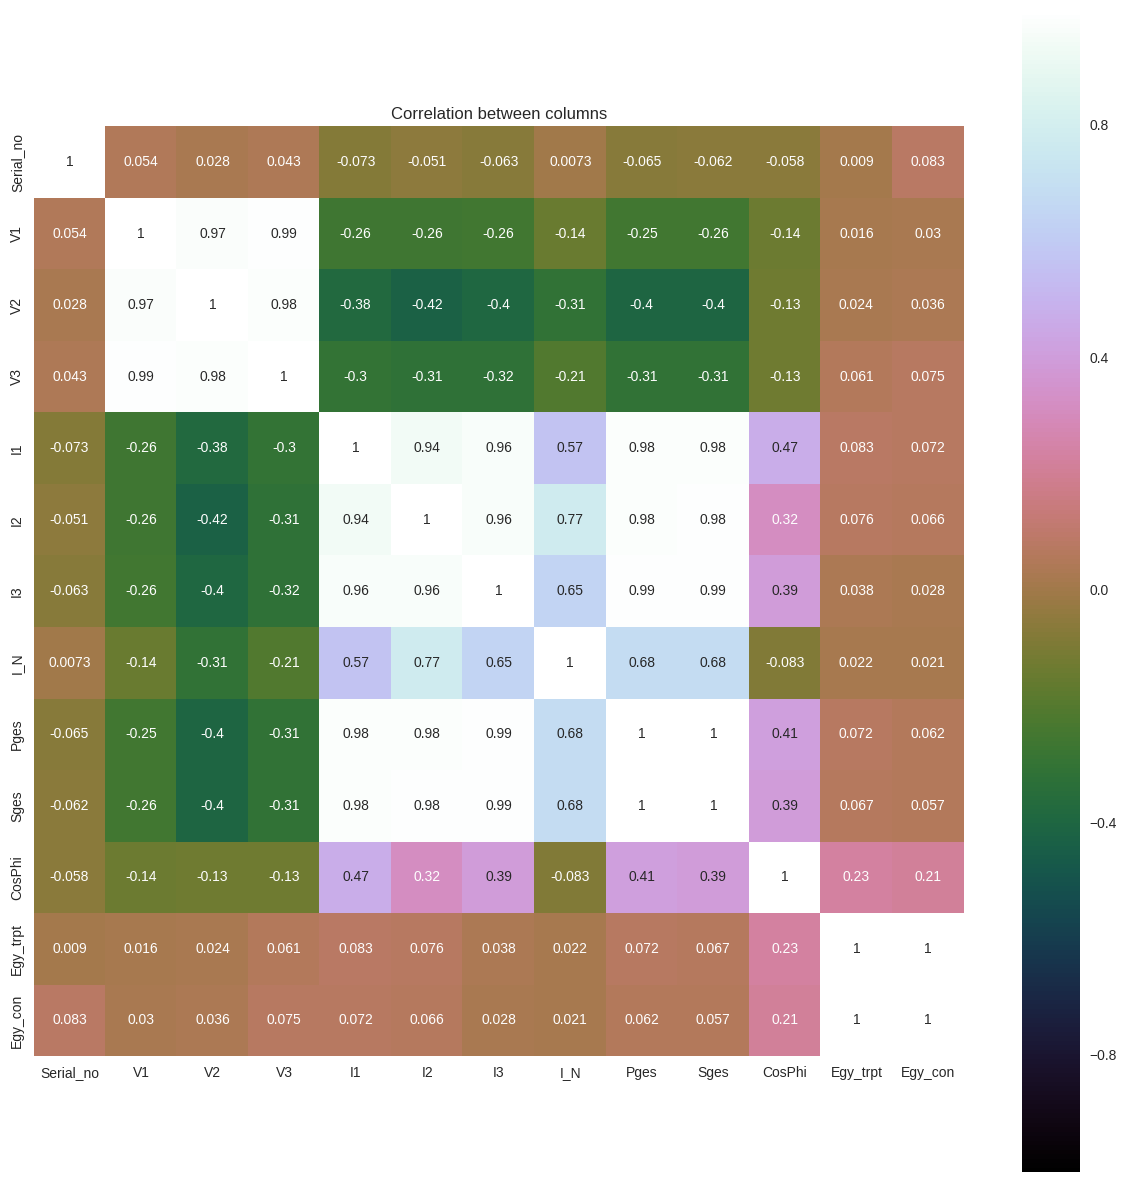

In [17]:
correlation = dfs.corr()
#plt.figure(figsize=(13,13))
fig = plt.figure(figsize=(15,15)) 
sns.heatmap(correlation, vmax=1, square=True,annot=True,cmap='cubehelix')

plt.title('Correlation between columns')

fig.savefig('Correlation_part1 Torschlag_Trafo_2235788_2840587.png')

# Statistics calculation implementation

# Plot statistics by grouping location 

In [18]:
dfs_loc = dfs.groupby('Location') # groupby location wise
#df_loc_part1 = dfs_drop_part1.groupby('Location') # groupby location wise

# Describe() : Produces the basic statistics of the DataFrame

In [19]:
dfs.drop(labels=['Time','Serial_no'],axis=1).describe()

,V1,V2,V3,I1,I2,I3,I_N,Pges,Sges,CosPhi,Egy_trpt,Egy_con
count,604800.000000,604800.000000,604800.000000,604800.000000,604800.000000,604800.000000,604800.000000,604800.000000,604800.000000,604800.000000,604800.000000,604800.000000
mean,234.165907,233.617374,233.583630,23.123130,42.513054,34.895365,20.455605,22071.843675,23455.550797,0.891413,13977.485526,14983741.637926
std,1.306234,1.389917,1.344538,25.453496,33.302732,28.649049,10.090990,18825.805246,20027.680799,0.042123,9838.869988,7090279.813558
min,228.800000,228.020000,228.090000,1.530000,3.120000,4.010000,4.720000,335.190000,3751.430000,0.490000,1674.000000,6242808.320000
25%,233.360000,232.730000,232.750000,6.360000,17.480000,13.890000,12.650000,8571.530000,9013.170000,0.870000,2813.000000,6996776.960000
50%,234.220000,233.710000,233.660000,8.260000,25.620000,20.370000,17.720000,12387.370000,12973.610000,0.900000,22495.000000,20141181.440000
75%,234.920000,234.490000,234.380000,34.700000,64.750000,50.350000,26.350000,32286.195000,34902.610000,0.920000,22495.000000,21231395.840000
max,239.310000,238.930000,238.820000,156.750000,180.030000,184.000000,95.340000,110086.580000,120531.200000,1.010000,22495.000000,22054917.120000


# Saving the basic statistics to csv

In [20]:
dfs.drop(labels=['Time','Serial_no'],axis=1).describe().to_csv(r'Torschlag_Trafo_2235788_2840587_describe.csv',sep=',')

In [26]:
#dfs.iloc[0:500000][:].describe().to_csv(r'Torschlag_Trafo_corr_desc_1.csv',sep=',')

In [27]:
#dfs.iloc[500000:1000000][:].describe().to_csv(r'Torschlag_Trafo_corr_desc_2.csv',sep=',')

In [28]:
#dfs.iloc[1000000:1500000][:].describe().to_csv(r'Torschlag_Trafo_corr_desc_3.csv',sep=',')

In [29]:
#dfs.iloc[1500000:2000000][:].describe().to_csv(r'Torschlag_Trafo_corr_desc_4.csv',sep=',')

In [30]:
#dfs.iloc[2000000:2500000][:].describe().to_csv(r'Torschlag_Trafo_corr_desc_5.csv',sep=',')

In [31]:
#dfs.iloc[2500000:3000000][:].describe().to_csv(r'Torschlag_Trafo_corr_desc_6.csv',sep=',')

In [32]:
#dfs.iloc[3000000:3500000][:].describe().to_csv(r'Torschlag_Trafo_corr_desc_7.csv',sep=',')

In [33]:
#dfs.iloc[3500000:4000000][:].describe().to_csv(r'Torschlag_Trafo_corr_desc_8.csv',sep=',')

In [34]:
#dfs.iloc[4000000:4500000][:].describe().to_csv(r'Torschlag_Trafo_corr_desc_9.csv',sep=',')

In [35]:
#dfs.iloc[4500000:-1][:].describe().to_csv(r'Torschlag_Trafo_corr_last.csv',sep=',')

# Below you will calculate the correlation on the data grouped by location

In [36]:
#dfs_grp_loc = dfs.iloc[0:500000][:]

In [37]:
#dfs_grp_loc.groupby('Location').describe()

In [22]:
dfs_loc.corr(method='pearson', min_periods=1)

CosPhi   Egy_con  Egy_trpt  \
Location                                                               
Torschlag_Trafo_13012016.csv CosPhi     1.000000 -0.119869       NaN   
                             Egy_con   -0.119869  1.000000       NaN   
                             Egy_trpt        NaN       NaN       NaN   
                             I1         0.662305  0.080507       NaN   
                             I2         0.551744  0.102822       NaN   
                             I3         0.610430  0.115455       NaN   
                             I_N        0.192227  0.154487       NaN   
                             Pges       0.621761  0.098850       NaN   
                             Serial_no -0.100506  0.979467       NaN   
                             Sges       0.610405  0.103333       NaN   
                             V1        -0.310961  0.055805       NaN   
                             V2        -0.327273 -0.013263       NaN   
                             V3        -0.303213  0.044163       NaN   
Torschlag_Trafo_13122015.csv CosPhi     1.000000  0.039248 -0.074390   
                             Egy_con    0.039248  1.000000  0.891776   
                             Egy_trpt  -0.074390  0.891776  1.000000   
                             I1         0.688024  0.127891  0.020262   
                             I2        -0.041302 -0.152724 -0.256537   
                             I3         0.405134  0.177259  0.076821   
                             I_N       -0.530570 -0.247715 -0.269260   
                             Pges       0.468265 -0.002412 -0.149910   
                             Serial_no  0.050294  0.997907  0.912148   
                             Sges       0.371498  0.009517 -0.142338   
                             V1        -0.070842 -0.137398 -0.233493   
                             V2        -0.045595 -0.217527 -0.313895   
                             V3        -0.081779 -0.219661 -0.297172   
Torschlag_Trafo_14012016.csv CosPhi     1.000000  0.027406       NaN   
                             Egy_con    0.027406  1.000000       NaN   
                             Egy_trpt        NaN       NaN       NaN   
                             I1         0.359380  0.066922       NaN   
...                                          ...       ...       ...   
Torschlag_Trafo_15012016.csv Sges       0.429531  0.002106       NaN   
                             V1         0.071169  0.472185       NaN   
                             V2         0.091513  0.389316       NaN   
                             V3         0.103369  0.443919       NaN   
Torschlag_Trafo_15122015.csv CosPhi     1.000000 -0.378481       NaN   
                             Egy_con   -0.378481  1.000000       NaN   
                             Egy_trpt        NaN       NaN       NaN   
                             I1         0.636798  0.032476       NaN   
                             I2         0.434866  0.135252       NaN   
                             I3         0.558086  0.093444       NaN   
                             I_N       -0.046123  0.219790       NaN   
                             Pges       0.557236  0.089679       NaN   
                             Serial_no -0.344159  0.983505       NaN   
                             Sges       0.547945  0.094250       NaN   
                             V1        -0.335798  0.447422       NaN   
                             V2        -0.321535  0.341400       NaN   
                             V3        -0.356731  0.408964       NaN   
Torschlag_Trafo_16012016.csv CosPhi     1.000000 -0.496229       NaN   
                             Egy_con   -0.496229  1.000000       NaN   
                             Egy_trpt        NaN       NaN       NaN   
                             I1         0.507430 -0.012420       NaN   
                             I2        -0.336484  0.371978       NaN   
                             I3         0.069353  0.281057       NaN   
          

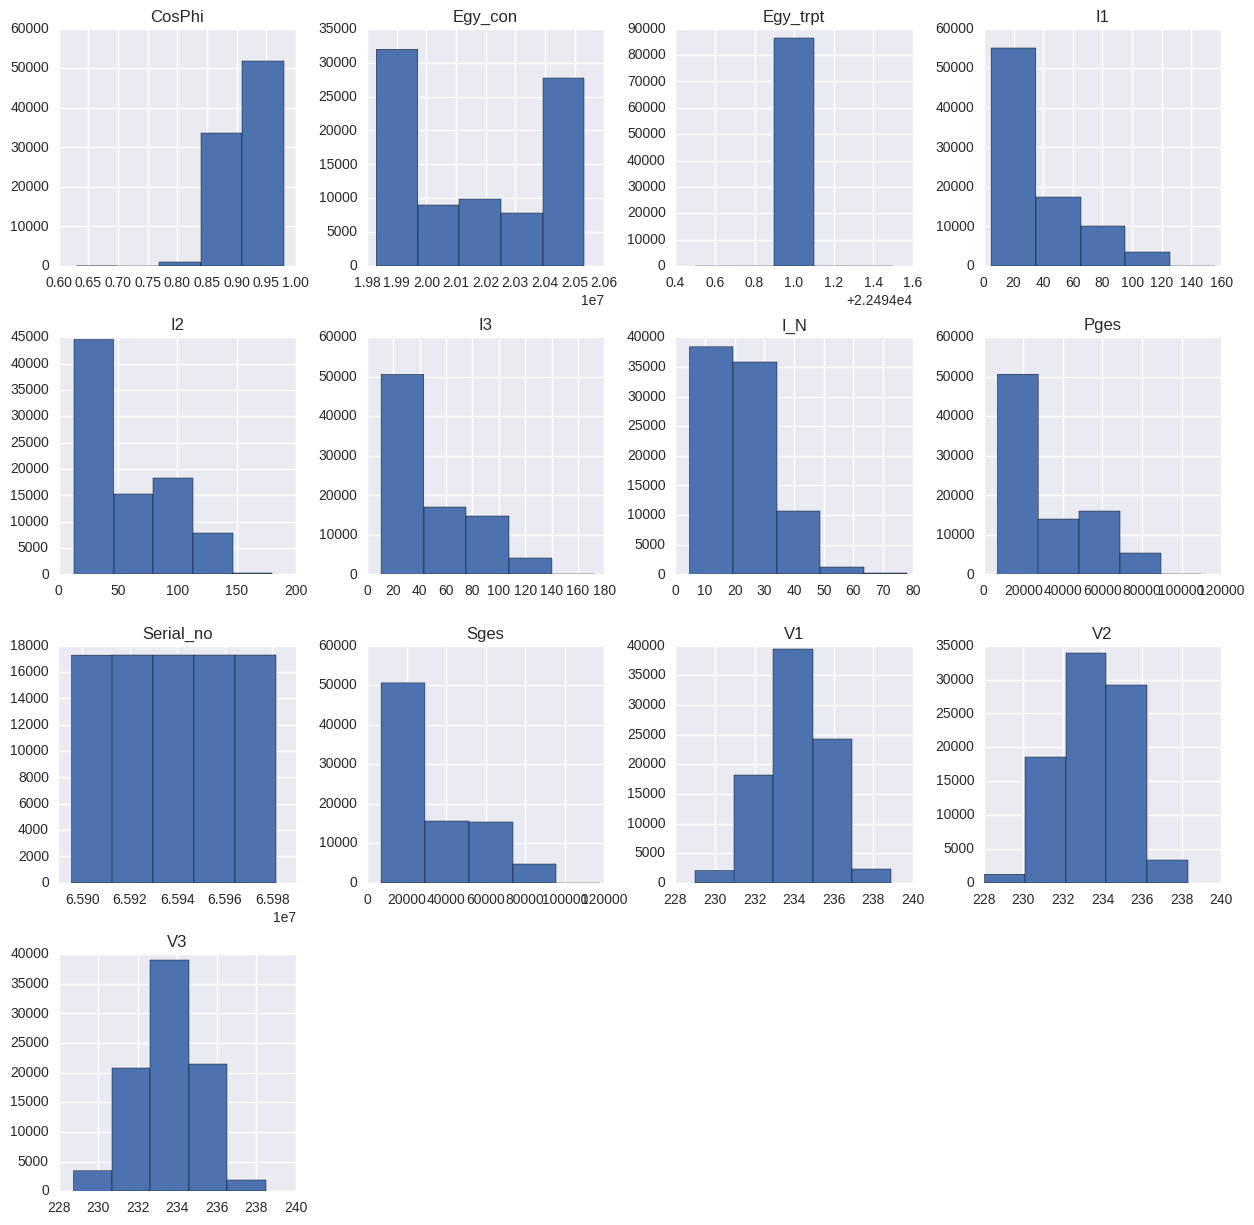

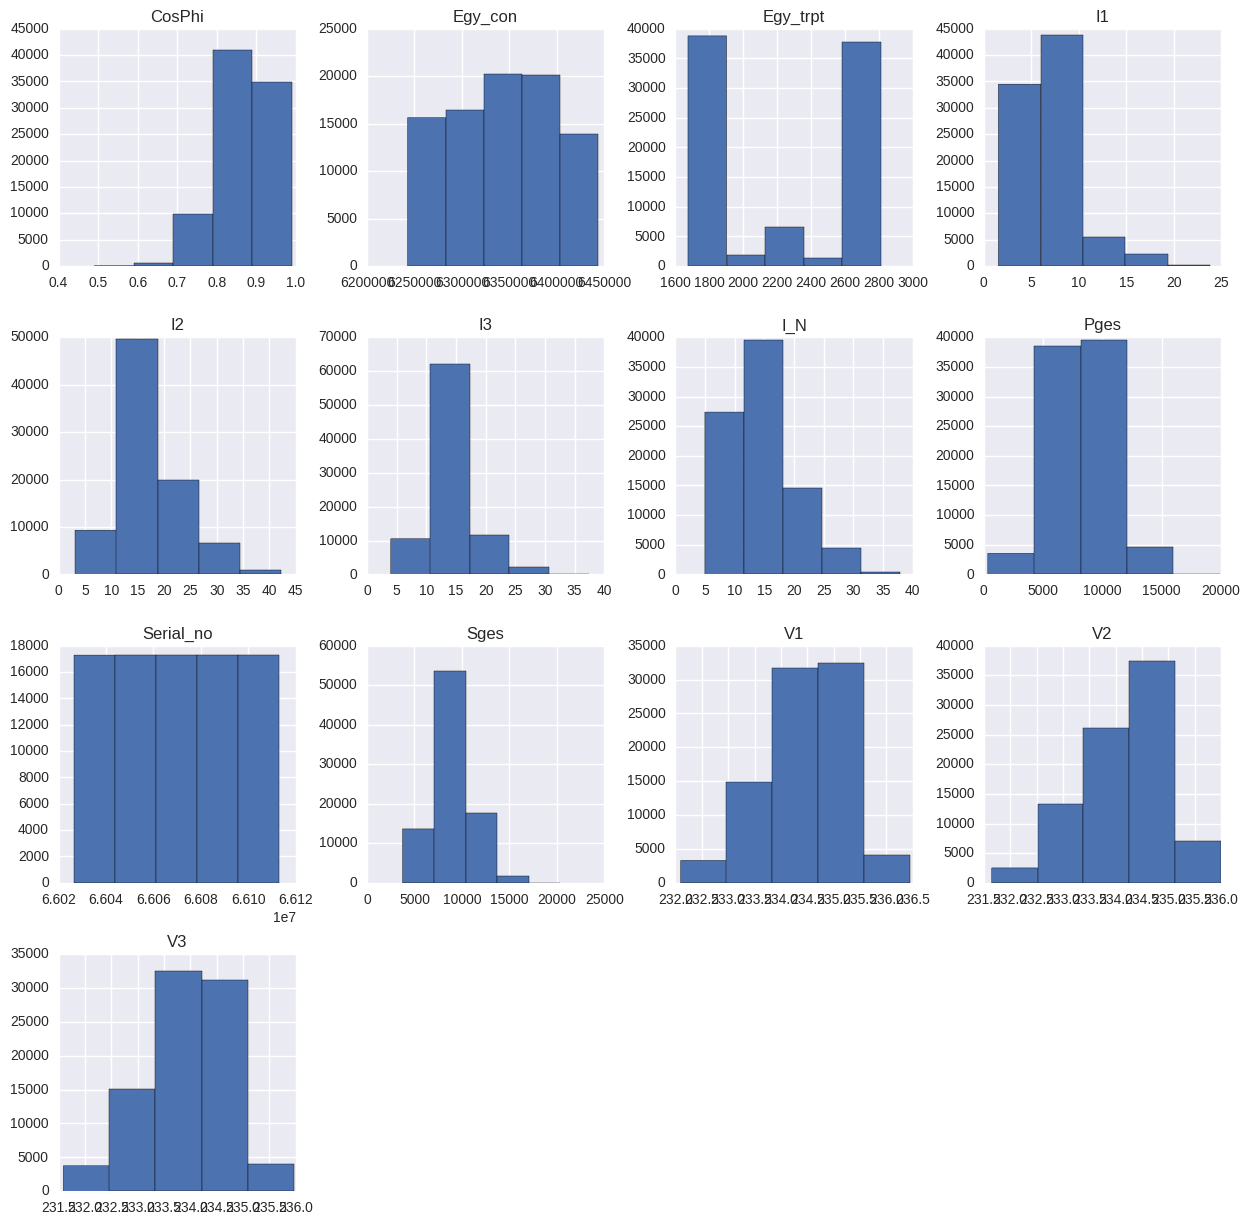

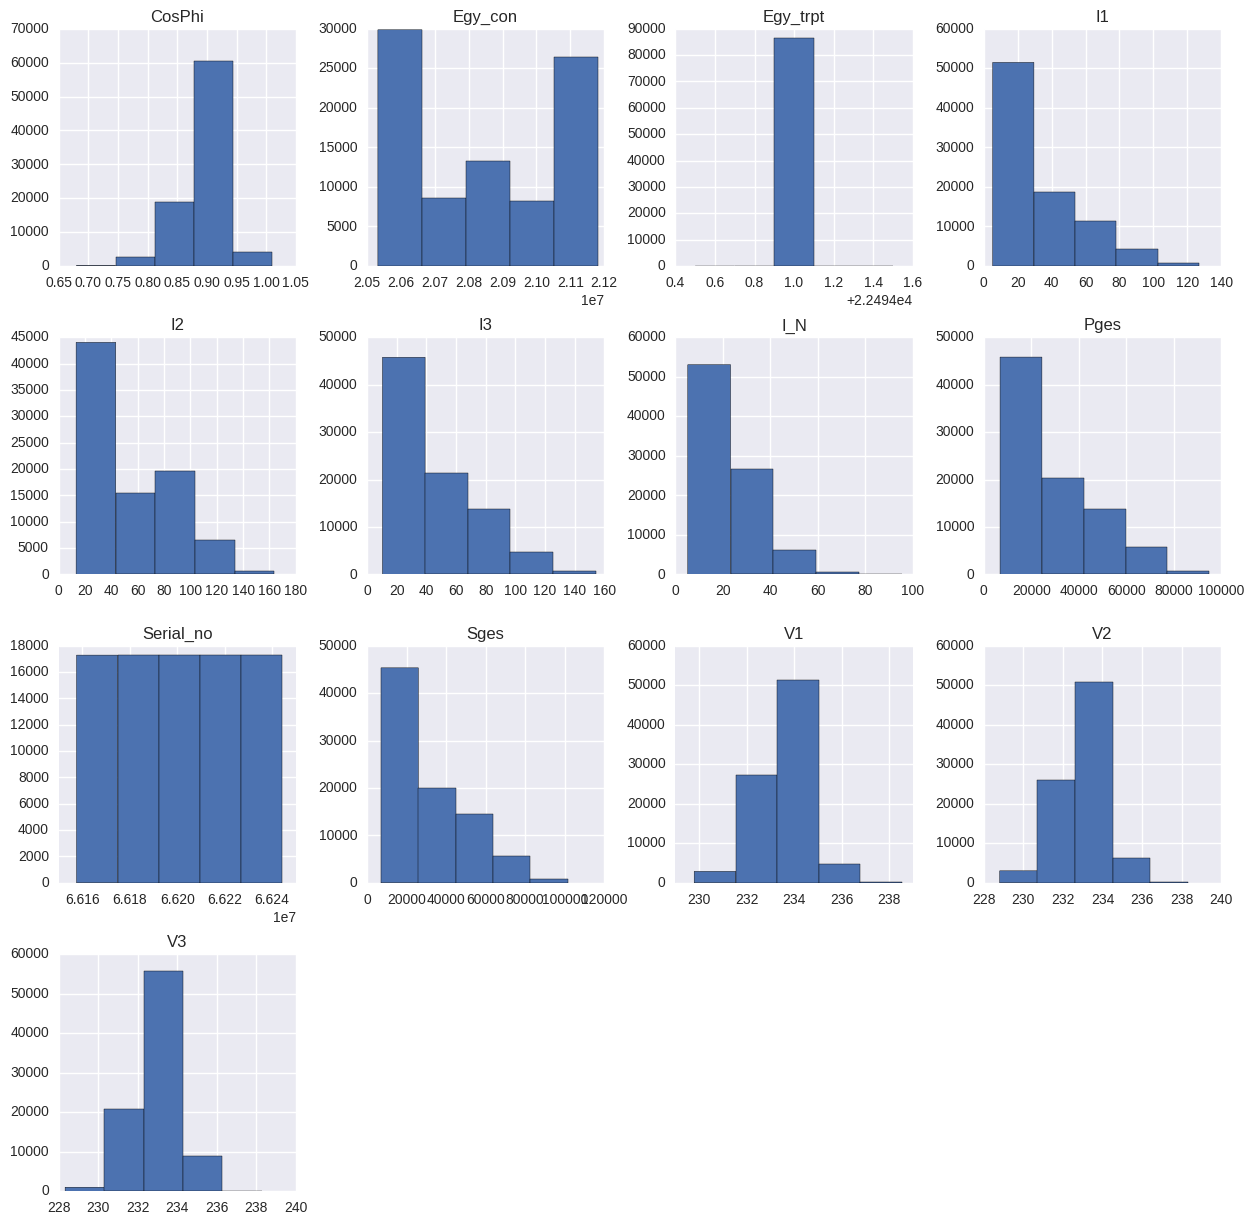

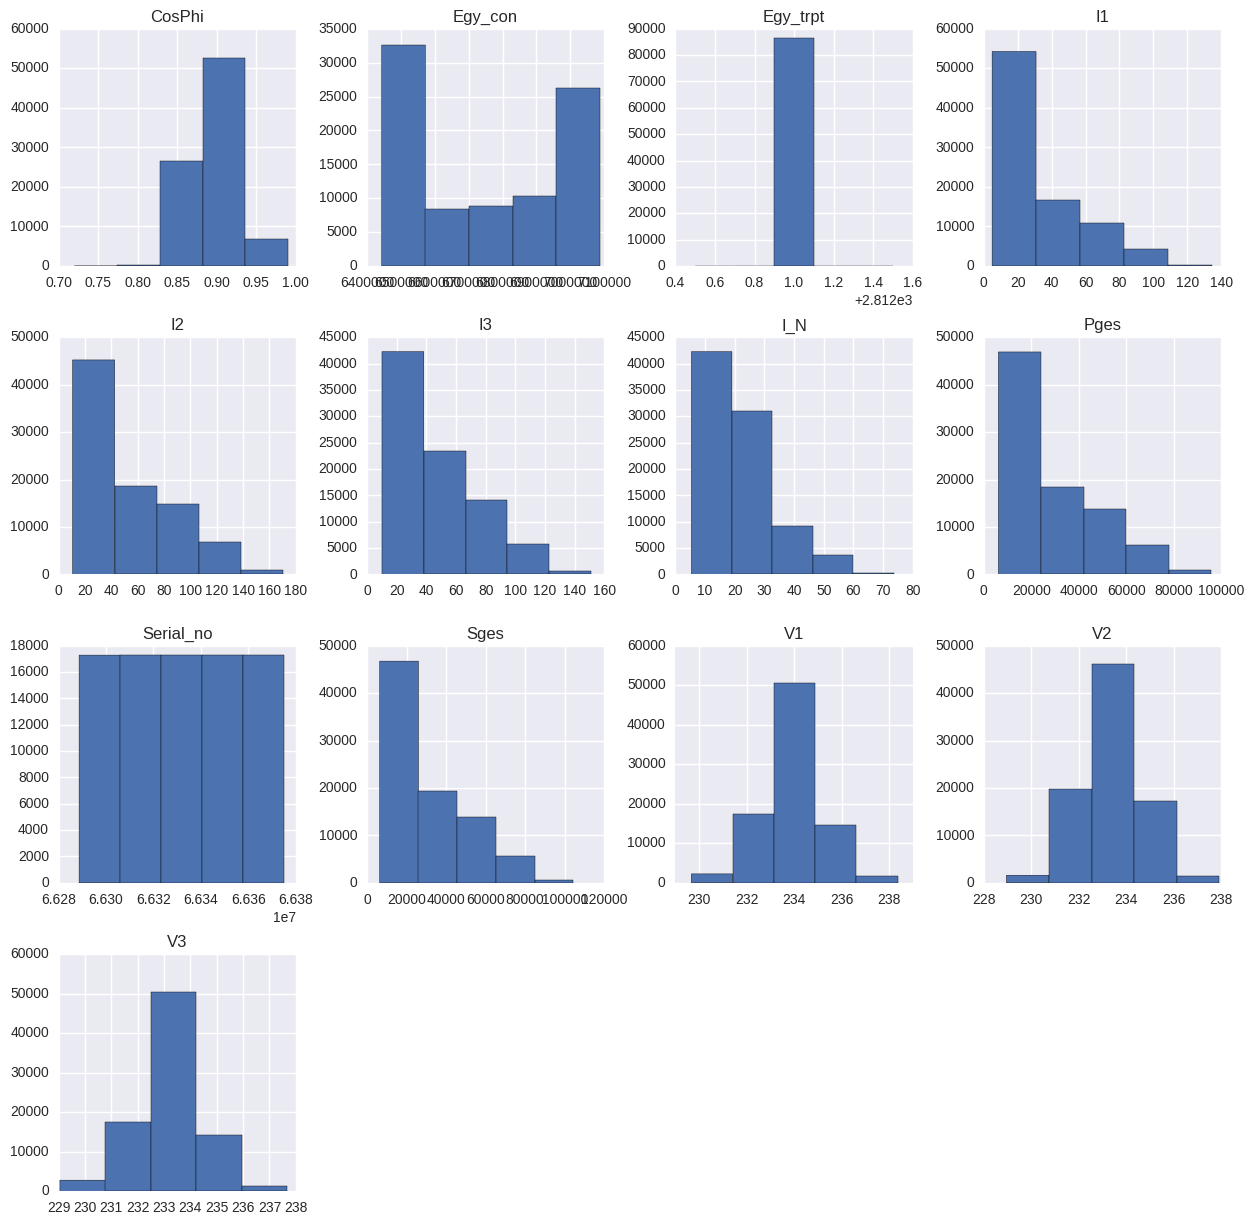

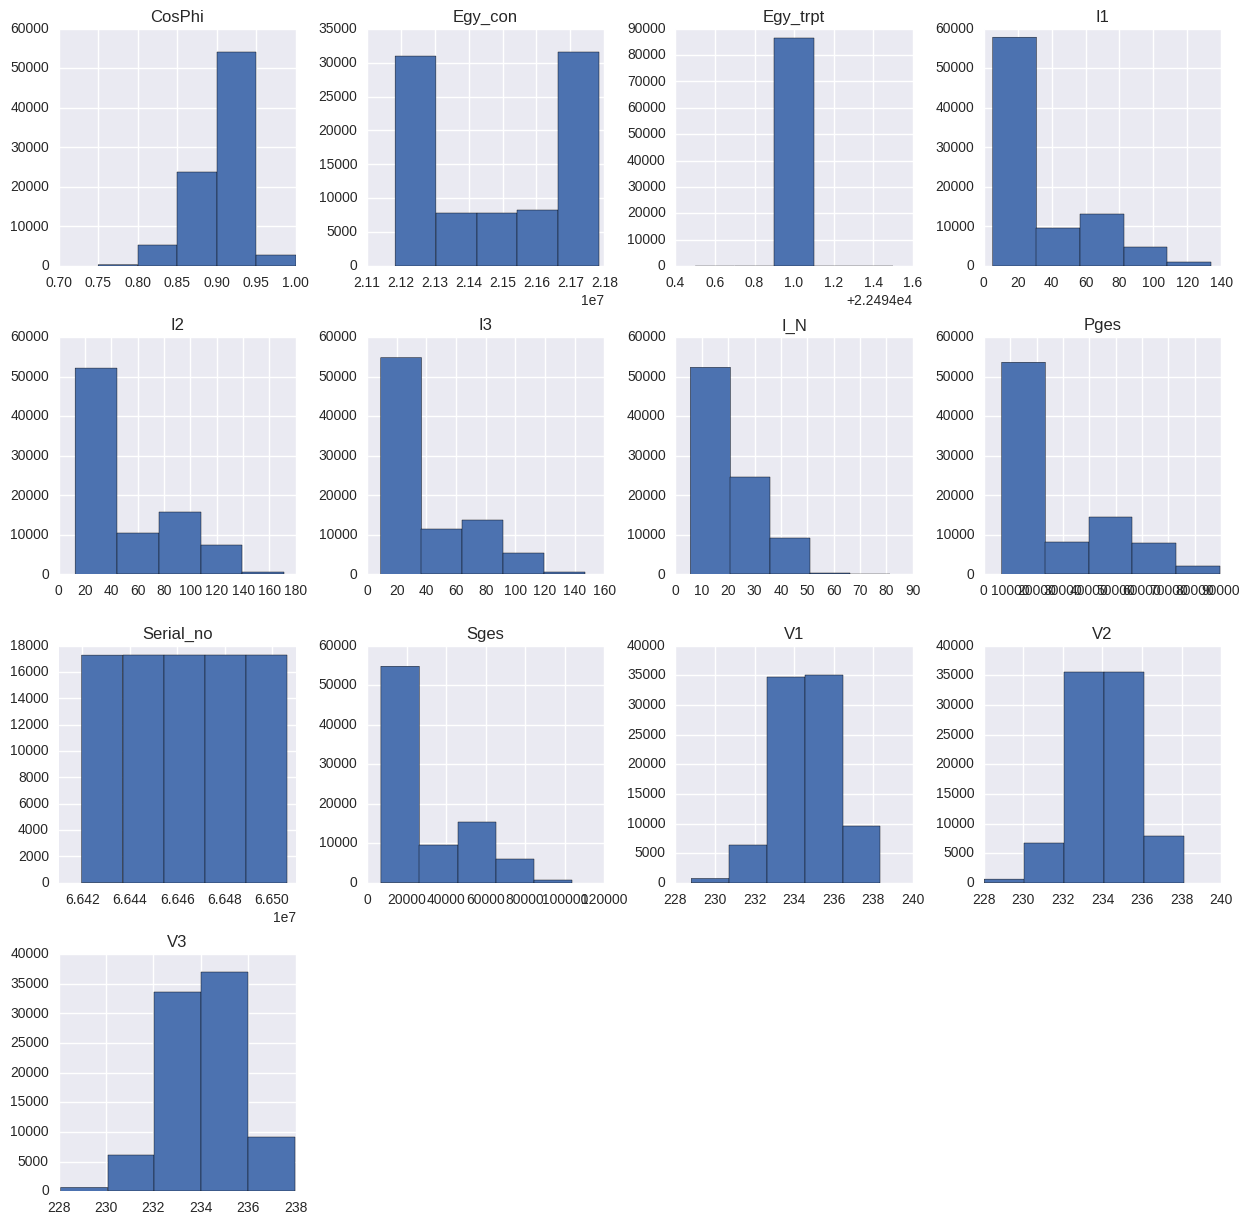

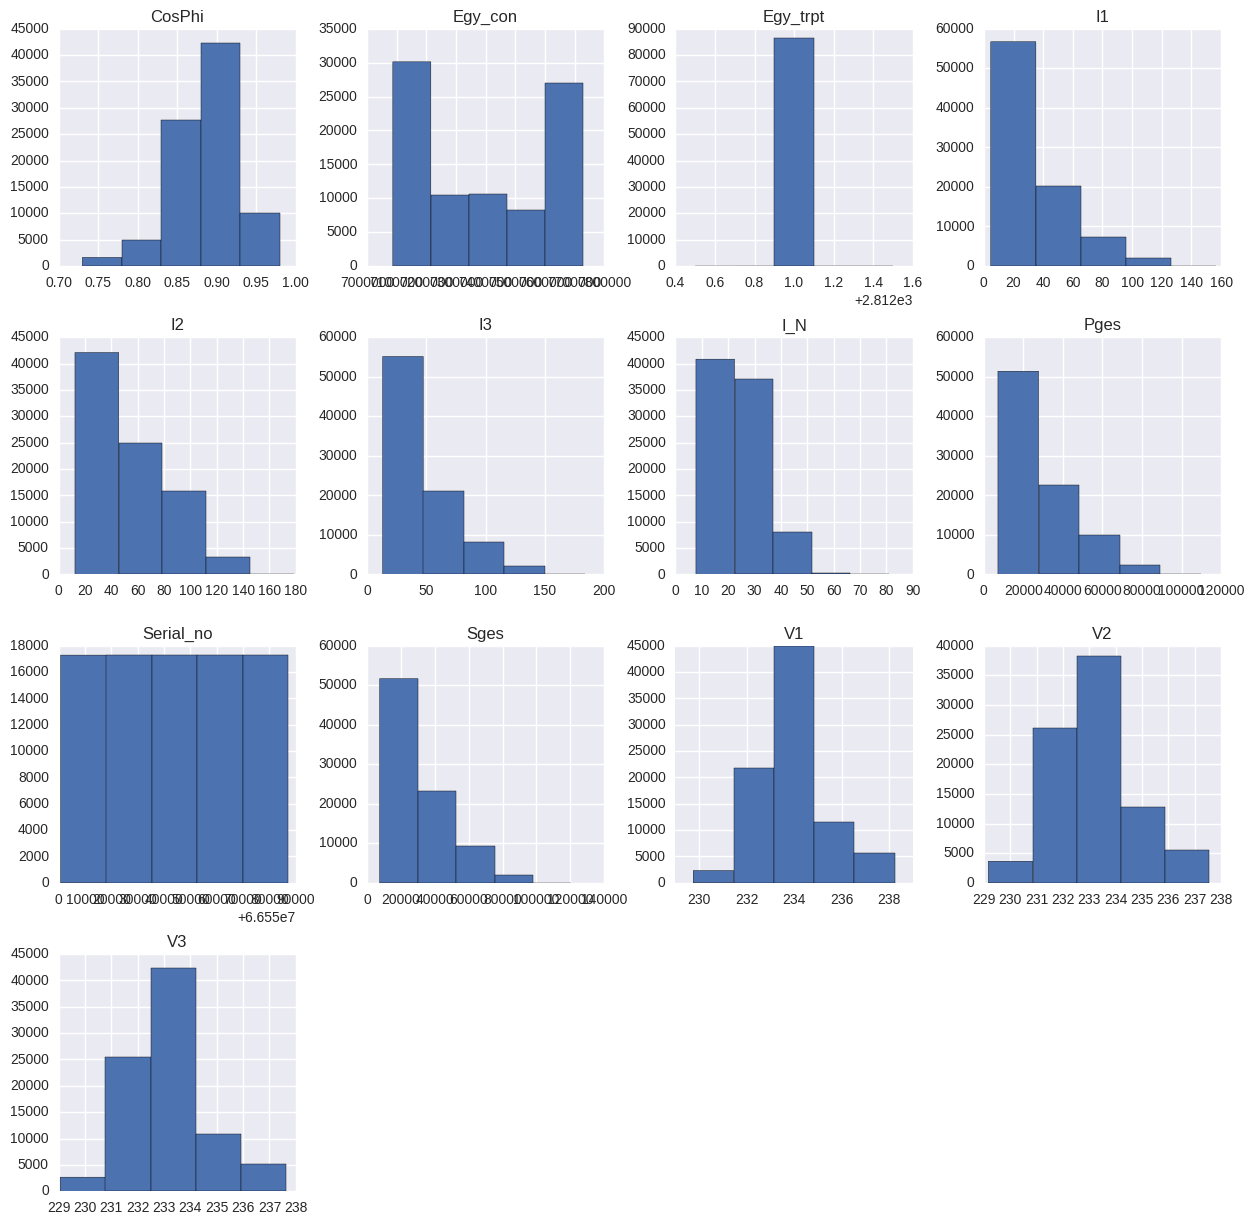

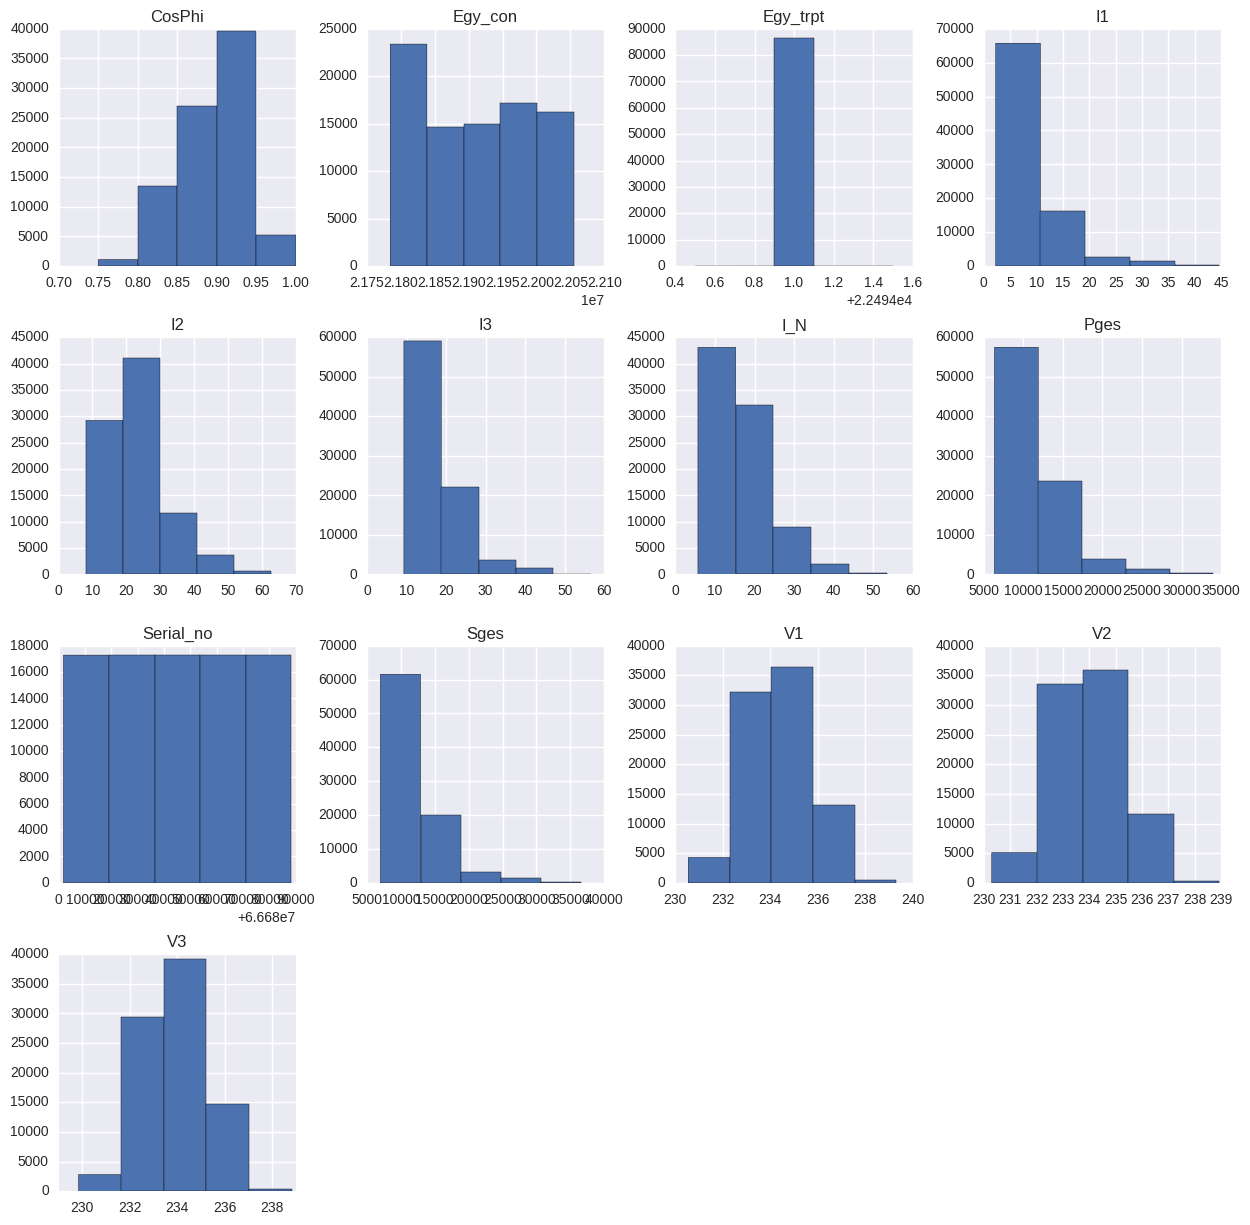

In [23]:
dfs_loc.hist(bins=5,figsize=(15,15))
plt.savefig('Torschlag_Trafo_groupby_location_pearson_corr_2235788_2840587.png')
    

# Compute only the mean of the data grouped by location and visualize

In [24]:
df_st_mean = dfs_loc.mean()
df_st_mean

,Serial_no,V1,V2,V3,I1,I2,I3,I_N,Pges,Sges,CosPhi,Egy_trpt,Egy_con
Location,,,,,,,,,,,,,
Torschlag_Trafo_13012016.csv,65938630,234.123794,233.538731,233.581159,32.125523,54.710264,44.474758,22.892950,29206.431103,30600.000739,0.911607,22495.000000,20162223.701849
Torschlag_Trafo_13122015.csv,66069700,234.483677,234.163307,233.955626,6.718272,17.249387,14.298783,14.562359,8314.209280,8957.308025,0.862328,2236.398681,6343122.132134
Torschlag_Trafo_14012016.csv,66200770,233.635130,233.044123,233.044068,29.404613,51.987955,43.528370,22.385726,27115.294935,29075.102040,0.895718,22495.000000,20846613.248412
Torschlag_Trafo_14122015.csv,66331840,233.970338,233.346666,233.282499,28.360839,49.923068,44.170337,21.871098,26826.299108,28577.435198,0.898219,2813.000000,6744533.144815
Torschlag_Trafo_15012016.csv,66462910,234.625825,234.071395,234.115374,28.509423,48.049312,36.985859,20.517418,25053.803935,26577.580373,0.902078,22495.000000,21483906.703971
Torschlag_Trafo_15122015.csv,66593980,233.958129,233.202261,233.206269,27.356202,52.249960,42.999421,24.280027,26707.230005,28554.608855,0.880807,2813.000000,7393319.518326
Torschlag_Trafo_16012016.csv,66725050,234.364455,233.955139,233.900417,9.387038,23.421436,17.810025,16.679655,11279.637360,11846.820346,0.889131,22495.000000,21912473.015971


In [25]:
df_st_mean.to_csv(r'Torschlag_trafo_mean_groupby_location_2235788_2840587.csv',sep=',')

# Plot the groupby location 

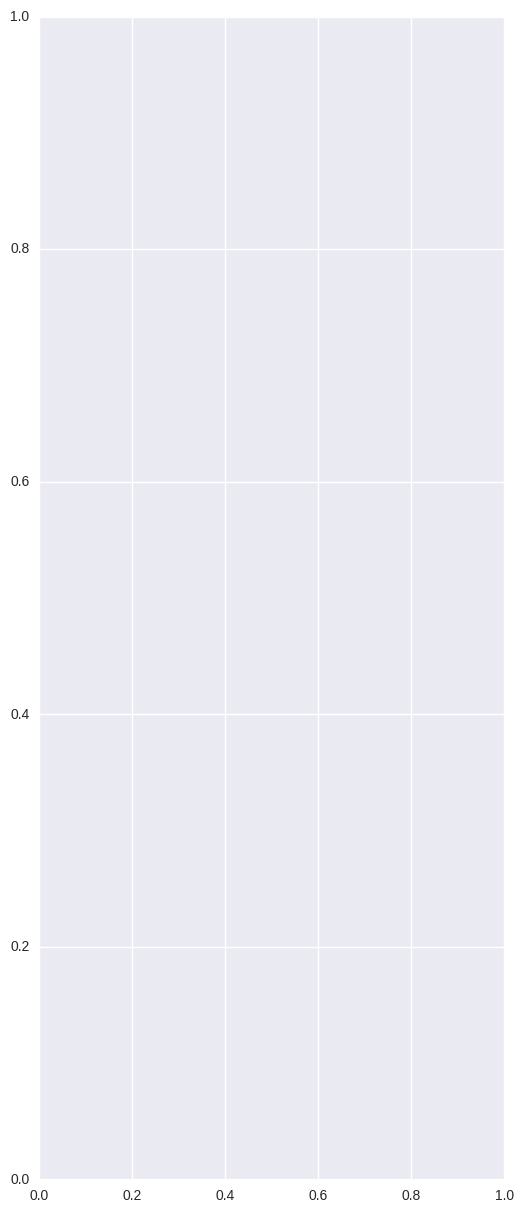

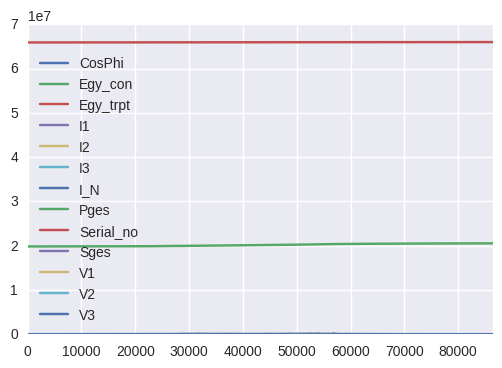

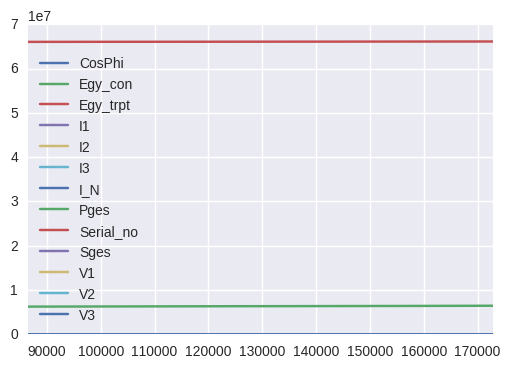

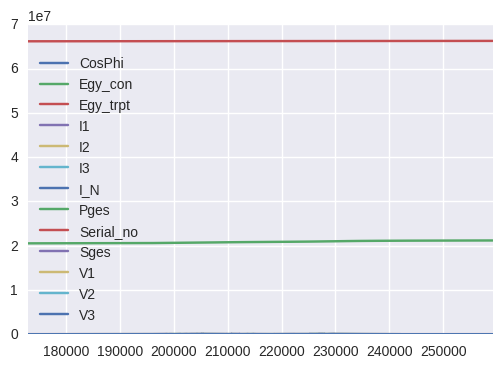

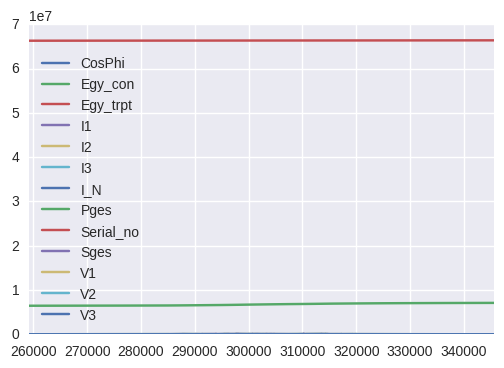

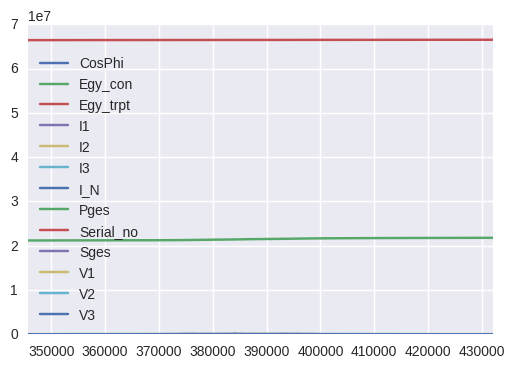

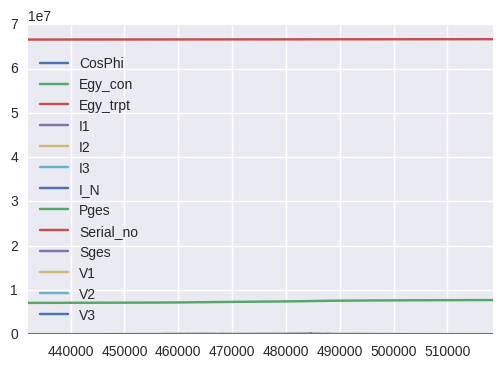

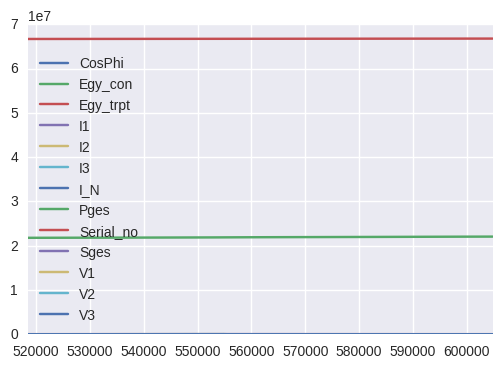

In [26]:
fig1,ax2 = plt.subplots(figsize=(6,15))
bp = dfs_loc.plot(kind='kde', ax2 = ax2, legend=False)


# PCA implementation

In [27]:
dfs_drop = dfs.drop(labels=['Serial_no', 'Date', 'Time','Location'],axis=1)

In [28]:
dfs_drop.columns

Index([u'V1', u'V2', u'V3', u'I1', u'I2', u'I3', u'I_N', u'Pges', u'Sges',
       u'CosPhi', u'Egy_trpt', u'Egy_con'],
      dtype='object')

In [29]:
X = dfs_drop.iloc[:,0:6].values
X

array([[ 232.66,  232.33,  232.13,    6.51,   17.78,   13.85],
       [ 232.66,  232.33,  232.13,    6.51,   17.78,   13.85],
       [ 232.74,  232.45,  232.26,    6.59,   14.24,   13.95],
       ..., 
       [ 234.63,  234.34,  234.12,    6.43,   18.84,   15.5 ],
       [ 234.63,  234.34,  234.12,    6.43,   18.84,   15.5 ],
       [ 234.63,  234.34,  234.12,    6.43,   18.84,   15.5 ]])

In [30]:
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X)

In [31]:
from sklearn.decomposition import PCA 
sklearn_pca = PCA(n_components=6)
Y_sklearn = sklearn_pca.fit_transform(X_std)

In [32]:
Y_sklearn.shape

(604800, 6)

In [33]:
n_components = pd.DataFrame(Y_sklearn, columns=('V1', 'V2', 'V3', 'I1', 'I2', 'I3'))
n_components.head()

,V1,V2,V3,I1,I2,I3
0,0.438829,-2.161528,-0.087619,0.022554,0.007083,0.004945
1,0.438829,-2.161528,-0.087619,0.022554,0.007083,0.004945
2,0.297135,-2.104068,-0.163817,-0.009493,-0.028490,-0.014985
3,0.297135,-2.104068,-0.163817,-0.009493,-0.028490,-0.014985
4,0.297135,-2.104068,-0.163817,-0.009493,-0.028490,-0.014985


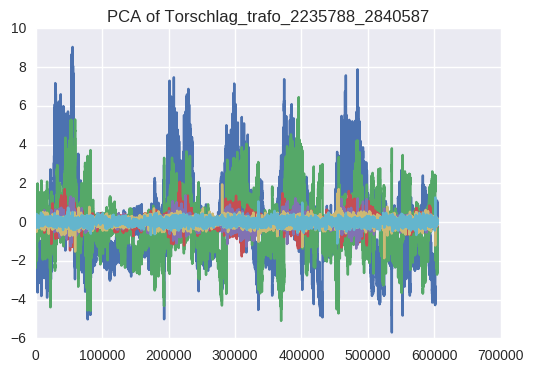

In [34]:
fig = plt.figure() 
plt.legend(loc='upper right')
plt.plot(n_components)
plt.title("PCA of Torschlag_trafo_2235788_2840587")

fig.savefig('PCA of Torschlag_Trafo_2235788_2840587.png')


# Plot voltage vs time

# Plot V1 and I1 vs Time of all locations extracted from SQL.

In [35]:
#dfs.iloc[500000:1000000][:].groupby('Location').describe()
dfs['Location'].unique()

array(['Torschlag_Trafo_13012016.csv', 'Torschlag_Trafo_13122015.csv',
       'Torschlag_Trafo_14012016.csv', 'Torschlag_Trafo_14122015.csv',
       'Torschlag_Trafo_15012016.csv', 'Torschlag_Trafo_15122015.csv',
       'Torschlag_Trafo_16012016.csv'], dtype=object)

In [36]:
def plotfunc(ax, a, b):
    return ax.plot(a, b)

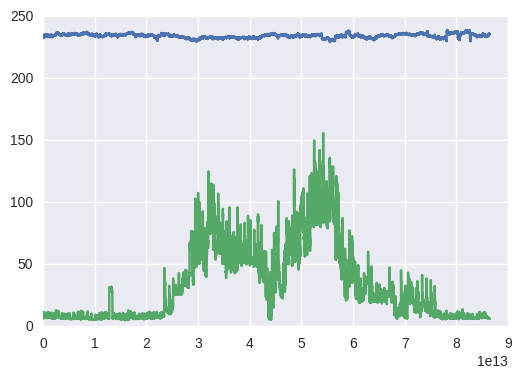

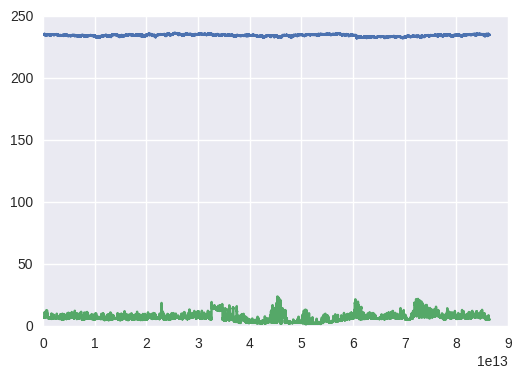

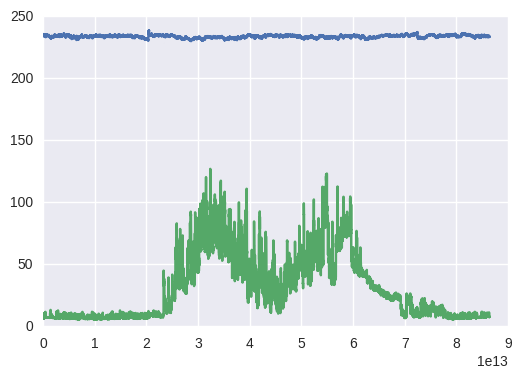

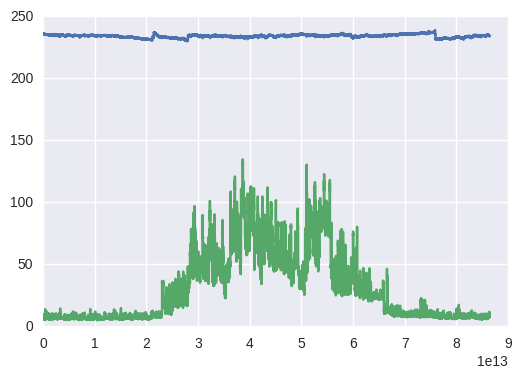

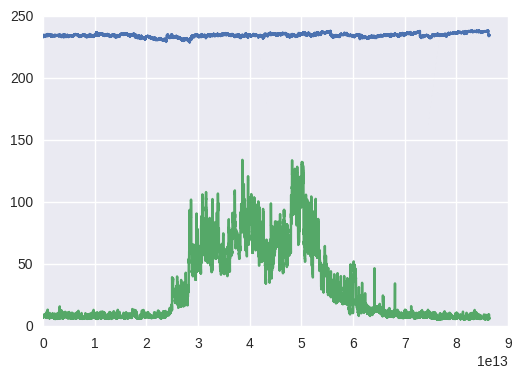

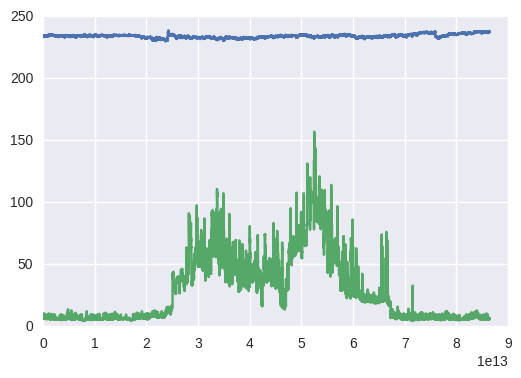

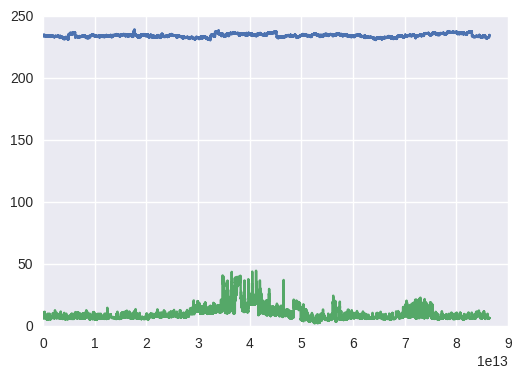

In [37]:
for loc in iter(dfs['Location'].unique()):
    fig, ax = plt.subplots(1,1)
    b = dfs['V1'].where (dfs['Location'] == loc)
    b1 = dfs['I1'].where (dfs['Location'] == loc)
    a = dfs['Time'].where (dfs['Location'] == loc)
    l1 = plotfunc(ax, a, b)
    l2 = plotfunc(ax, a, b1)
    plt.savefig('V1_I1_Time of %s.png' % loc)
    plt.show()